# Libreta de Guillermo
Se hacen pruebas sobre las distintas etapas del proyecto individualmente para después juntar lo mejor de todas

Para almacenar llaves de git: `git config credential.helper store`

# 1. Descarga de datos

## 1.x Obtener el enlace usando BeautifulSoup

In [1]:
from bs4 import BeautifulSoup as bs
import requests

In [2]:
# Muy probablemente este link cambiará cada mes, debemos obtenerlo usando alguna técnica de web scrapping
url_general = r"https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva"
page = requests.get(url_general)
soup = bs(page.content, 'html.parser')

In [3]:
div = soup.find_all('div', class_='article-body')
print(div)

[<div class="article-body"><h3>Reportes de incidencia delictiva al mes de agosto 2023 (Nueva metodología).</h3>
<p><em>fecha de actualización: 20 de septiembre de 2023</em></p>
<ul>
<li><a href="https://drive.google.com/file/d/1iCY71DLzgcWtyycUlOeS6BvxARL91gf-/view?usp=sharing">Cifras de Incidencia Delictiva Estatal, 2015 - agosto  2023</a></li>
<li><a href="https://drive.google.com/file/d/13TjyJ9RkR49o0eWTFvhNqazeL4maORYp/view?usp=sharing">Cifras de Incidencia Delictiva Municipal, 2015 - agosto 2023. </a><strong>Importante: </strong>Debido al tamaño del archivo este no puede ser cargado en una hoja de cálculo (Excel o Calc), para descargar los archivos compatibles con estos programas utilice el siguiente enlace:   <a href="https://drive.google.com/file/d/1xNe-X81kiSmnlAzjO3Bw4v7CBnAs2_hB/view?usp=sharing">https://drive.google.com/file/d/1xNe-X81kiSmnlAzjO3Bw4v7CBnAs2_hB/view?usp=sharing</a></li>
<li><a href="https://drive.google.com/file/d/1JsXir5EGFMcEjtJKzZSu7hSdEt5zYOX9/view?usp=sh

In [4]:
links = div[0].find_all("a")
print(links[1]["href"])
url = links[1]["href"]

https://drive.google.com/file/d/13TjyJ9RkR49o0eWTFvhNqazeL4maORYp/view?usp=sharing


## 1.1 Utilizar la librería gdown

El usuario `wkentaro` ha desarrollado una librería para descargar archivos desde un enlace de **Google Drive** utilizando Python. Puedes encontrar la librería [aquí](https://github.com/wkentaro/gdown).

In [5]:
import gdown
import os
from pathlib import Path
from datetime import datetime

# agregar ?usp=sharing
# url = r"https://drive.google.com/file/d/1Z2DduhVJB2_JRurPW6iVhR4tsnDjNREs/view?usp=sharing"
# url = r"https://drive.google.com/file/d/1JQI38_raLzmIRT0lvf01BkQayz-xubm-/view?usp=sharing"
ruta_data=  Path("../data/")
nombre_csv = Path("datos.csv")
output = ruta_data / nombre_csv
gdown.download(url, str(output), quiet=False, fuzzy=True)

Downloading...
From (uriginal): https://drive.google.com/uc?id=13TjyJ9RkR49o0eWTFvhNqazeL4maORYp
From (redirected): https://drive.google.com/uc?id=13TjyJ9RkR49o0eWTFvhNqazeL4maORYp&confirm=t&uuid=34e91e9a-cf71-43c1-93ac-43d182ba4a96
To: c:\Users\Guillermo\OneDrive - Universidad de Sonora (1)\Maestria\Ingenieria de Caracteristicas\Proyectos\proyecto1_semaforo-delictivo\semaforo-delictivo\data\datos.csv
100%|██████████| 306M/306M [00:53<00:00, 5.67MB/s] 


'..\\data\\datos.csv'

In [30]:
output

WindowsPath('../data/datos.csv')

In [25]:
import pandas as pd
df = pd.read_csv(output, encoding='iso-8859-1')
df.shape

(2075738, 21)

## 1.x Crear archivo `info.txt`

In [10]:
ruta_data

WindowsPath('../data')

In [9]:
with open(ruta_data / "info.txt", 'w') as f:

    fecha_hoy = datetime.now()
    fecha_hoy_str = fecha_hoy.strftime("%Y-%m-%d %H:%M:%S")

    f.write("Datos Abiertos de Incidencia Delictiva\n")
    info = """
Reportes de incidencia delictiva al mes de julio 2023 (Nueva metodología).
En esta página podrás encontrar los archivos de datos abiertos referentes 
a incidencia delictiva, así como sus diccionarios de datos.
"""
    f.write(info + '\n')
    f.write(f"Descargado el {fecha_hoy_str} \n")
    f.write(f"Desde: {url_general}\n")
    f.write(f"Url del csv: {url} \n")
    f.write("Nombre de los arcivos: \n")
    # for i, file in enumerate(files, start=1):
    #     f.write(f"{i}. {file} \n")

# 2. Transformación de los datos

In [2]:
import pandas as pd
import numpy as np

## Exploración de los datos

In [13]:
df

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075733,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075734,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075735,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075736,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075738 entries, 0 to 2075737
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Año                     int64  
 1   Clave_Ent               int64  
 2   Entidad                 object 
 3   Cve. Municipio          int64  
 4   Municipio               object 
 5   Bien jurídico afectado  object 
 6   Tipo de delito          object 
 7   Subtipo de delito       object 
 8   Modalidad               object 
 9   Enero                   int64  
 10  Febrero                 int64  
 11  Marzo                   int64  
 12  Abril                   int64  
 13  Mayo                    int64  
 14  Junio                   int64  
 15  Julio                   int64  
 16  Agosto                  int64  
 17  Septiembre              float64
 18  Octubre                 float64
 19  Noviembre               float64
 20  Diciembre               float64
dtypes: float64(4), int64(11), objec

In [32]:
url_general = r"https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva"
page = requests.get(url_general)
soup = bs(page.content, 'html.parser')
div = soup.find_all('div', class_='article-body')
links = div[0].find_all("a")
url_delitos = links[1]["href"]

#Una vez obtenido el enlace, descargar archivo con gdown
if os.path.exists('./data'):
  if not os.path.exists('./data/data_delitos.csv'):
    gdown.download(url_delitos, './data/data_delitos.csv', fuzzy=True)
else:
  os.mkdir('./data')
  gdown.download(url_delitos, './data/data_delitos.csv', fuzzy=True)

Downloading...
From (uriginal): https://drive.google.com/uc?id=13TjyJ9RkR49o0eWTFvhNqazeL4maORYp
From (redirected): https://drive.google.com/uc?id=13TjyJ9RkR49o0eWTFvhNqazeL4maORYp&confirm=t&uuid=af3b6c7e-52d2-4aa8-a34d-ed254adbf356
To: c:\Users\Guillermo\OneDrive - Universidad de Sonora (1)\Maestria\Ingenieria de Caracteristicas\Proyectos\proyecto1_semaforo-delictivo\semaforo-delictivo\notebooks\data\data_delitos.csv
100%|██████████| 306M/306M [02:37<00:00, 1.94MB/s] 


In [3]:
df = pd.read_csv('data/data_delitos.csv', encoding = 'iso-8859-1')

## Pandas profiler

In [ ]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [4]:
df.isna().sum()

Año                            0
Clave_Ent                      0
Entidad                        0
Cve. Municipio                 0
Municipio                      0
Bien jurídico afectado         0
Tipo de delito                 0
Subtipo de delito              0
Modalidad                      0
Enero                          0
Febrero                        0
Marzo                          0
Abril                          0
Mayo                           0
Junio                          0
Julio                          0
Agosto                         0
Septiembre                243334
Octubre                   243334
Noviembre                 243334
Diciembre                 243334
dtype: int64

<Axes: >

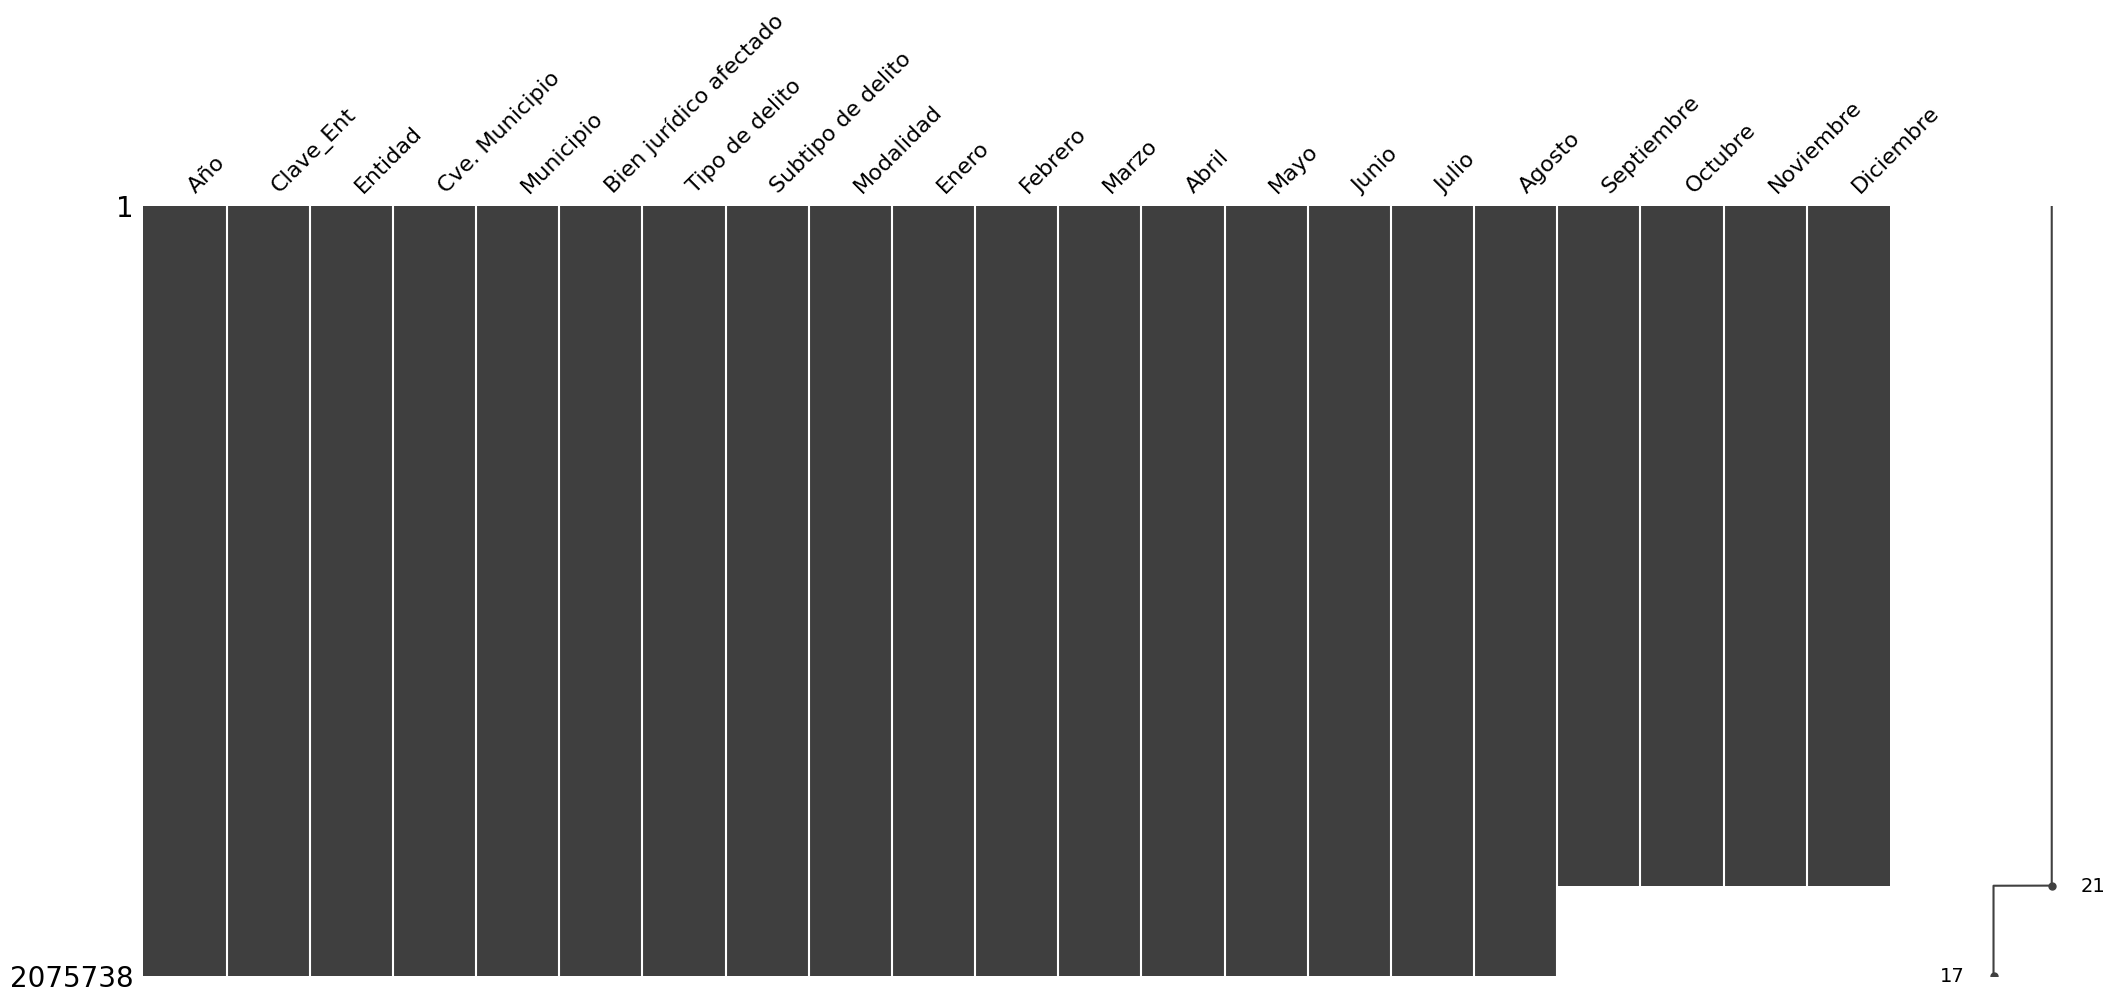

In [12]:
%matplotlib inline
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)

Se puede ver que los valores faltantes estan en la ultima parte del dataset (fechas mas actuales) y en los ultimos meses. Esto quire decir que no hay datos capturados a partir de septiembre para 2023.

In [14]:
df.tail()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
2075733,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075734,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075735,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075736,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2075737,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,0,...,1,0,0,0,0,1,NaN,NaN,NaN,NaN


In [43]:
df_v2 = df.copy()
df_v2 = df_v2.fillna(0)

In [44]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075738 entries, 0 to 2075737
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Año                     int64  
 1   Clave_Ent               int64  
 2   Entidad                 object 
 3   Cve. Municipio          int64  
 4   Municipio               object 
 5   Bien jurídico afectado  object 
 6   Tipo de delito          object 
 7   Subtipo de delito       object 
 8   Modalidad               object 
 9   Enero                   int64  
 10  Febrero                 int64  
 11  Marzo                   int64  
 12  Abril                   int64  
 13  Mayo                    int64  
 14  Junio                   int64  
 15  Julio                   int64  
 16  Agosto                  int64  
 17  Septiembre              float64
 18  Octubre                 float64
 19  Noviembre               float64
 20  Diciembre               float64
dtypes: float64(4), int64(11), objec

Al parecer no hay consistencia en los tipos (algunos son flotantes).

In [40]:
df.columns[9:]

Index(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

In [45]:
df_v2[df_v2.columns[9:]] = df_v2[df_v2.columns[9:]].astype(int)

In [46]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075738 entries, 0 to 2075737
Data columns (total 21 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Año                     int64 
 1   Clave_Ent               int64 
 2   Entidad                 object
 3   Cve. Municipio          int64 
 4   Municipio               object
 5   Bien jurídico afectado  object
 6   Tipo de delito          object
 7   Subtipo de delito       object
 8   Modalidad               object
 9   Enero                   int32 
 10  Febrero                 int32 
 11  Marzo                   int32 
 12  Abril                   int32 
 13  Mayo                    int32 
 14  Junio                   int32 
 15  Julio                   int32 
 16  Agosto                  int32 
 17  Septiembre              int32 
 18  Octubre                 int32 
 19  Noviembre               int32 
 20  Diciembre               int32 
dtypes: int32(12), int64(3), object(6)
memory usage: 237.5+

In [22]:
df_v2.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
df_2023 = df_v2[(df_v2["Año"] == 2023)]
df_2023.shape

(243334, 21)

In [48]:
print(df_2023["Bien jurídico afectado"].unique())
print()
print(df_2023["Tipo de delito"].unique())
print()
print(df_2023["Subtipo de delito"].unique())
print()
print(df_2023["Modalidad"].unique())
print()

['La vida y la Integridad corporal' 'Libertad personal'
 'La libertad y la seguridad sexual' 'El patrimonio' 'La familia'
 'La sociedad' 'Otros bienes jurídicos afectados (del fuero común)']

['Homicidio' 'Lesiones' 'Feminicidio' 'Aborto'
 'Otros delitos que atentan contra la vida y la integridad corporal'
 'Secuestro' 'Tráfico de menores' 'Rapto'
 'Otros delitos que atentan contra la libertad personal' 'Abuso sexual'
 'Acoso sexual' 'Hostigamiento sexual' 'Violación simple'
 'Violación equiparada' 'Incesto'
 'Otros delitos que atentan contra la libertad y la seguridad sexual'
 'Robo' 'Fraude' 'Abuso de confianza' 'Extorsión' 'Daño a la propiedad'
 'Despojo' 'Otros delitos contra el patrimonio' 'Violencia familiar'
 'Violencia de género en todas sus modalidades distinta a la violencia familiar'
 'Incumplimiento de obligaciones de asistencia familiar'
 'Otros delitos contra la familia' 'Corrupción de menores'
 'Trata de personas' 'Otros delitos contra la sociedad' 'Narcomenudeo'
 'Amena

In [38]:
df_2023[df_2023["Tipo de delito"] == "Robo"].sample(2)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
2023459,2023,26,Sonora,26039,Naco,El patrimonio,Robo,Robo a transeúnte en espacio abierto al público,Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
2021709,2023,26,Sonora,26021,La Colorada,El patrimonio,Robo,Robo de maquinaria,Robo de herramienta industrial o agrícola Con ...,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_2023[df_2023["Modalidad"] == "Sin violencia"].sample(2)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
2022376,2023,26,Sonora,26028,Granados,El patrimonio,Robo,Robo de autopartes,Sin violencia,0,...,0,0,0,0,0,0,0,0,0,0
2020524,2023,26,Sonora,26009,Bacanora,El patrimonio,Robo,Robo en transporte público colectivo,Sin violencia,0,...,0,0,0,0,0,0,0,0,0,0


## Filtrar los delitos del semaforo

In [85]:
df_2023[(df_2023["Entidad"] == "Sonora") & (df_2023["Tipo de delito"] == "Homicidio")].iloc[:, 9:].sum()

Enero         152
Febrero       133
Marzo         141
Abril          96
Mayo          116
Junio          94
Julio          98
Agosto        120
Septiembre      0
Octubre         0
Noviembre       0
Diciembre       0
dtype: int64

In [87]:
df_2023[(df_2023["Entidad"] == "Sonora") & (df_2023["Subtipo de delito"] == "Homicidio doloso")].iloc[:, 9:].sum()

Enero         125
Febrero       113
Marzo         118
Abril          76
Mayo           85
Junio          81
Julio          83
Agosto         99
Septiembre      0
Octubre         0
Noviembre       0
Diciembre       0
dtype: int64

In [88]:
df_2023[(df_2023["Entidad"] == "Sonora") & (df_2023["Subtipo de delito"] == "Homicidio doloso")].iloc[:, 9:].sum().sum()

780

In [86]:
df_2023[(df_2023["Entidad"] == "Sonora") & (df_2023["Tipo de delito"] == "Homicidio")].iloc[:, 9:].sum().sum()

950

In [50]:
delitos_semaforo = [
    "Homicidio", "Secuestro", "Extorsión", "Narcomenudeo",
    "Lesiones", "Violación simple", "Violación equiparada",
    "Violencia familiar", "Feminicidio",
]

subdelitos_semaforo = [
    "Robo de vehículo automotor",
    "Robo a casa habitación",
    "Robo a negocio",
]

df_sem = df_2023[ 
    (df_2023["Tipo de delito"].isin(delitos_semaforo)) | 
    (df_2023["Subtipo de delito"].isin(subdelitos_semaforo)) ]

In [54]:
print(df_sem["Subtipo de delito"].unique())

['Homicidio doloso' 'Homicidio culposo' 'Lesiones dolosas'
 'Lesiones culposas' 'Feminicidio' 'Secuestro' 'Violación simple'
 'Violación equiparada' 'Robo a casa habitación'
 'Robo de vehículo automotor' 'Robo a negocio' 'Extorsión'
 'Violencia familiar' 'Narcomenudeo']


In [67]:
for row_i in range(df_sem.shape[0]):
    # print(row_i)
    row_actual = df_sem.iloc[row_i]
    subtipo_delito = row_actual["Subtipo de delito"]
    print(subtipo_delito)
    print("homicidio" in subtipo_delito.lower())
    break

Homicidio doloso
True


## Sanity Checks

### Verificar valores y conteo de datos unicos

In [21]:
len(df_v2["Entidad"].unique())

32

# 3. Propuesta de nuevo semáforo delictivo

## Descargar la tabla de proyección de población de CONAPO
Accediendo al sitio de la CONAPO disponible aquí: [proyeccion de poblacion](https://www.gob.mx/conapo/documentos/bases-de-datos-de-la-conciliacion-demografica-1950-a-2019-y-proyecciones-de-la-poblacion-de-mexico-2020-a-2070?idiom=es).

In [91]:
import os
import urllib.request as ur
import zipfile as zip

url_proyecciones = 'https://conapo.segob.gob.mx/work/models/CONAPO/pry23/DB/ConDem50a19_ProyPob20a70.zip'

if os.path.exists('./data'):
  if not os.path.exists('./data/datos_proyecciones.zip'):
    ur.urlretrieve(url_proyecciones, './data/datos_proyecciones.zip')
else:
  os.mkdir('./data')
  ur.urlretrieve(url_proyecciones, './data/datos_proyecciones.zip')

In [92]:
# Descompactando...

with zip.ZipFile('./data/datos_proyecciones.zip', 'r') as file:
  file.extract(member = "ConDem50a19_ProyPob20a70/0_Pob_Inicio_1950_2070.xlsx", path = './data')
  file.extract(member = "ConDem50a19_ProyPob20a70/0_Pob_Mitad_1950_2070.xlsx", path = './data')

In [93]:
# Movemos a la raiz de carpeta Data...

if not os.path.exists('./data/0_Pob_Inicio_1950_2070.xlsx'):
    os.rename('./data/ConDem50a19_ProyPob20a70/0_Pob_Inicio_1950_2070.xlsx', './data/0_Pob_Inicio_1950_2070.xlsx')

In [94]:
df_proyecciones = pd.read_excel("./data/0_Pob_Inicio_1950_2070.xlsx")

In [112]:
df_proyecciones.head()

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
0,1,1950,República Mexicana,0,0,Hombres,577250
1,2,1950,República Mexicana,0,0,Mujeres,564734
2,3,1950,República Mexicana,0,1,Hombres,520692
3,4,1950,República Mexicana,0,1,Mujeres,511958
4,5,1950,República Mexicana,0,2,Hombres,487298


# Mapas

In [103]:
import geopandas as gpd

In [110]:
url_datos_geograficos = 'https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463142683_s.zip'

if os.path.exists('./data'):
  if not os.path.exists('./data/data_mapa_mexico.zip'):
    ur.urlretrieve(url_datos_geograficos,'./data/data_mapa_mexico.zip')
else:
  os.mkdir('./data')
  ur.urlretrieve(url_datos_geograficos,'./data/data_mapa_mexico.zip')

#extraemos archivos necesarios shp, shx, cpg, dbf y prj (todos se necesitan aunque solo se lea el shp)
with zip.ZipFile('./data/data_mapa_mexico.zip') as archivo:
  #descargamos archivos de entidades
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.shp', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.CPG', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.shx', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.dbf', path = './data/')
  archivo.extract(member = 'conjunto_de_datos/areas_geoestadisticas_estatales.prj', path = './data/')

#Guardamos poligonos municipales y estatales
gdf_datos_geograficos_ent = gpd.read_file('./data/conjunto_de_datos/areas_geoestadisticas_estatales.shp').to_crs(epsg=4485)

#hacemos la columna clave_municipio en  gdf_datos_geograficos_mun
# gdf_datos_geograficos_mun['clave_municipio'] = gdf_datos_geograficos_mun['CVE_ENT'].astype('int').astype('str')+gdf_datos_geograficos_mun['CVE_MUN']

<Axes: >

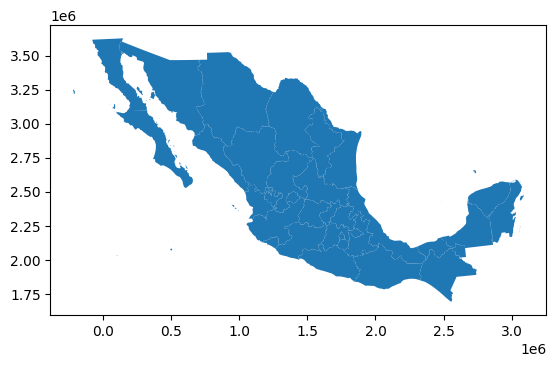

In [111]:
gdf_datos_geograficos_ent.plot()

In [117]:
gdf_datos_geograficos_ent

,CVE_ENT,NOM_ENT,geometry
0,01,Aguascalientes,"POLYGON ((1399097.407 2505133.242, 1399135.075..."
1,02,Baja California,"MULTIPOLYGON (((-73299.920 3616364.503, -73182..."
2,03,Baja California Sur,"MULTIPOLYGON (((613401.945 2530080.962, 613389..."
3,04,Campeche,"MULTIPOLYGON (((2680608.332 2449379.070, 26818..."
4,05,Coahuila de Zaragoza,"POLYGON ((1340716.464 3337061.430, 1340745.265..."
5,06,Colima,"MULTIPOLYGON (((104967.058 2035414.498, 105057..."
6,07,Chiapas,"POLYGON ((2545955.811 2087694.924, 2546379.242..."
7,08,Chihuahua,"POLYGON ((816623.125 3521330.635, 816949.757 3..."
8,09,Ciudad de México,"POLYGON ((1756639.551 2201293.477, 1756648.216..."
9,10,Durango,"POLYGON ((1000647.248 2972607.339, 1003548.048..."


In [113]:
df_proyecciones.head()

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
0,1,1950,República Mexicana,0,0,Hombres,577250
1,2,1950,República Mexicana,0,0,Mujeres,564734
2,3,1950,República Mexicana,0,1,Hombres,520692
3,4,1950,República Mexicana,0,1,Mujeres,511958
4,5,1950,República Mexicana,0,2,Hombres,487298


In [160]:
poblacion_est_2023 = df_proyecciones[df_proyecciones["AÑO"] == 2023].groupby("CVE_GEO")["POBLACION"].sum()

In [145]:
df_proyecciones[df_proyecciones["AÑO"] == 2023][df_proyecciones["CVE_GEO"] == 1]

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_25844\1858723214.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_proyecciones[df_proyecciones["AÑO"] == 2023][df_proyecciones["CVE_GEO"] == 1]


,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
389400,389401,2023,Aguascalientes,1,0,Hombres,13180
389401,389402,2023,Aguascalientes,1,0,Mujeres,12707
389402,389403,2023,Aguascalientes,1,1,Hombres,13211
389403,389404,2023,Aguascalientes,1,1,Mujeres,12705
389404,389405,2023,Aguascalientes,1,2,Hombres,13040
...,...,...,...,...,...,...,...
389615,389616,2023,Aguascalientes,1,107,Mujeres,1
389616,389617,2023,Aguascalientes,1,108,Hombres,1
389617,389618,2023,Aguascalientes,1,108,Mujeres,0
389618,389619,2023,Aguascalientes,1,109,Hombres,0


In [148]:
poblacion_est_2023.shape

(33,)

In [139]:
gdf_datos_geograficos_ent['CVE_ENT'] = gdf_datos_geograficos_ent['CVE_ENT'].astype('int')

In [147]:
gdf_datos_geograficos_ent['CVE_ENT']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    23
22    24
23    25
24    26
25    27
26    28
27    29
28    30
29    31
30    32
31    22
Name: CVE_ENT, dtype: int32

In [161]:
poblacion_est_2023.iloc[1:].shape

(32,)

In [154]:
gdf_datos_geograficos_ent.shape

(32, 4)

In [159]:
poblacion_est_2023

CVE_GEO
0     130555656
1       1501081
2       3979513
3        858560
4        948000
5       3295384
6        754866
7       5904967
8       3923261
9       9229871
10      1892074
11      6392255
12      3602510
13      3209273
14      8692181
15     17441998
16      4926226
17      2024147
18      1286397
19      6148962
20      4260710
21      6866167
22      2533271
23      1998609
24      2918486
25      3130893
26      3066575
27      2451193
28      3669309
29      1404030
30      8132954
31      2436635
32      1675298
Name: POBLACION, dtype: int64

In [162]:
gdf_datos_geograficos_ent

,CVE_ENT,NOM_ENT,geometry,POS_EST,POB_EST
0,1,Aguascalientes,"POLYGON ((1399097.407 2505133.242, 1399135.075...",130555656,NaN
1,2,Baja California,"MULTIPOLYGON (((-73299.920 3616364.503, -73182...",1501081,1501081.0
2,3,Baja California Sur,"MULTIPOLYGON (((613401.945 2530080.962, 613389...",3979513,3979513.0
3,4,Campeche,"MULTIPOLYGON (((2680608.332 2449379.070, 26818...",858560,858560.0
4,5,Coahuila de Zaragoza,"POLYGON ((1340716.464 3337061.430, 1340745.265...",948000,948000.0
5,6,Colima,"MULTIPOLYGON (((104967.058 2035414.498, 105057...",3295384,3295384.0
6,7,Chiapas,"POLYGON ((2545955.811 2087694.924, 2546379.242...",754866,754866.0
7,8,Chihuahua,"POLYGON ((816623.125 3521330.635, 816949.757 3...",5904967,5904967.0
8,9,Ciudad de México,"POLYGON ((1756639.551 2201293.477, 1756648.216...",3923261,3923261.0
9,10,Durango,"POLYGON ((1000647.248 2972607.339, 1003548.048...",9229871,9229871.0


In [156]:
gdf_datos_geograficos_ent = gdf_datos_geograficos_ent.sort_values(by="CVE_ENT")
gdf_datos_geograficos_ent["POB_EST"] = poblacion_est_2023.iloc[1:]

In [157]:
gdf_datos_geograficos_ent.head()

,CVE_ENT,NOM_ENT,geometry,POS_EST,POB_EST
0,1,Aguascalientes,"POLYGON ((1399097.407 2505133.242, 1399135.075...",130555656,NaN
1,2,Baja California,"MULTIPOLYGON (((-73299.920 3616364.503, -73182...",1501081,1501081.0
2,3,Baja California Sur,"MULTIPOLYGON (((613401.945 2530080.962, 613389...",3979513,3979513.0
3,4,Campeche,"MULTIPOLYGON (((2680608.332 2449379.070, 26818...",858560,858560.0
4,5,Coahuila de Zaragoza,"POLYGON ((1340716.464 3337061.430, 1340745.265...",948000,948000.0


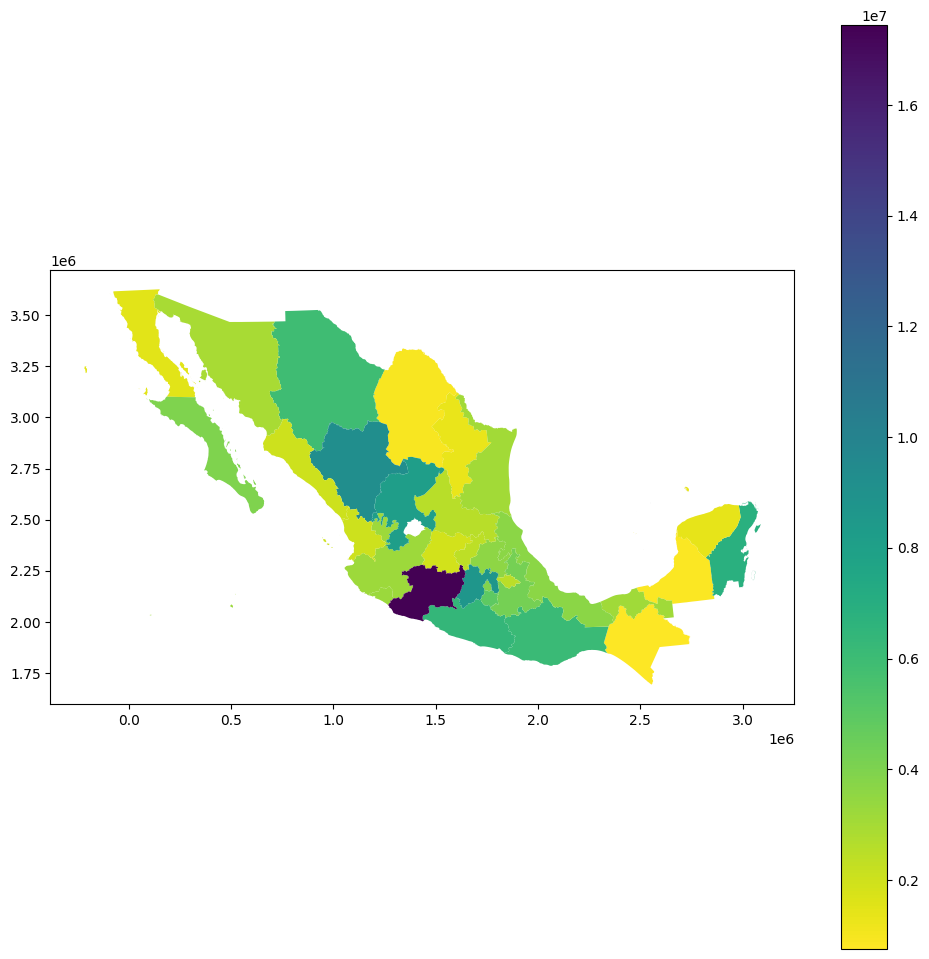

In [163]:
fig, ax = plt.subplots()


gdf_datos_geograficos_ent.plot(column='POB_EST', legend=True, cmap='viridis_r', ax=ax)
fig.set_size_inches(12,12)

# Calcular KPIs

In [166]:
import pandas as pd
# De la libreta de viowi
kpi = pd.read_csv("./data/kpi.csv")

In [180]:
gdf_datos_geograficos_ent["KPI"] = kpi[kpi["Año"]==2023]["IIC"].values

In [179]:
kpi[kpi["Año"]==2023]["IIC"].values

array([54.9, 77.6, 43.1, 41.8, 36.4, 85.4,  5.2, 44.8, 37.9, 24.5, 49.5,
       19.6, 27.6, 30.9, 43.4, 23.7, 59.6, 21.2, 31.2, 22.1, 28.6, 47.9,
       53.4, 44.2, 30.5, 29.2, 28.5, 24.4, 18.5, 22.5,  2.6, 31. ])

In [181]:
gdf_datos_geograficos_ent.head()

,CVE_ENT,NOM_ENT,geometry,POS_EST,POB_EST,KPI
0,1,Aguascalientes,"POLYGON ((1399097.407 2505133.242, 1399135.075...",130555656,NaN,54.9
1,2,Baja California,"MULTIPOLYGON (((-73299.920 3616364.503, -73182...",1501081,1501081.0,77.6
2,3,Baja California Sur,"MULTIPOLYGON (((613401.945 2530080.962, 613389...",3979513,3979513.0,43.1
3,4,Campeche,"MULTIPOLYGON (((2680608.332 2449379.070, 26818...",858560,858560.0,41.8
4,5,Coahuila de Zaragoza,"POLYGON ((1340716.464 3337061.430, 1340745.265...",948000,948000.0,36.4


In [192]:
kpi[kpi["Año"]==2023]["IIC"]

256    54.9
257    77.6
258    43.1
259    41.8
260    36.4
261    85.4
262     5.2
263    44.8
264    37.9
265    24.5
266    49.5
267    19.6
268    27.6
269    30.9
270    43.4
271    23.7
272    59.6
273    21.2
274    31.2
275    22.1
276    28.6
277    47.9
278    53.4
279    44.2
280    30.5
281    29.2
282    28.5
283    24.4
284    18.5
285    22.5
286     2.6
287    31.0
Name: IIC, dtype: float64

In [198]:
gdf_datos_geograficos_ent["KPI"].min()

2.6

<Axes: >

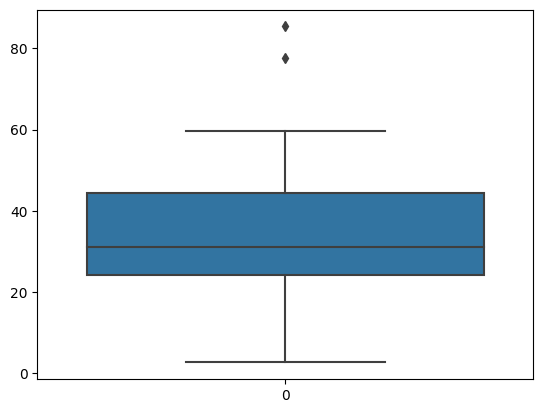

In [193]:
import seaborn as sns
sns.boxplot(data=kpi[kpi["Año"]==2023]["IIC"].values)

In [200]:
np.percentile(kpi[kpi["Año"]==2023]["IIC"], [25, 75])

array([24.225, 44.35 ])

In [241]:
q1, q2 = np.percentile(kpi[kpi["Año"]==2023]["IIC"], [25, 75])
def asign_color(x):
    if x < q1: return "#79DE79"
    if x >= q1 and x < q2: return "#FCFC99"
    if x >= q2: return "#FB6962" # Rojo

# kpi[kpi["Año"]==2023]["IIC"].apply(asign_color)

In [242]:
gdf_datos_geograficos_ent["KPI_color"] = kpi[kpi["Año"]==2023]["IIC"].apply(asign_color).values

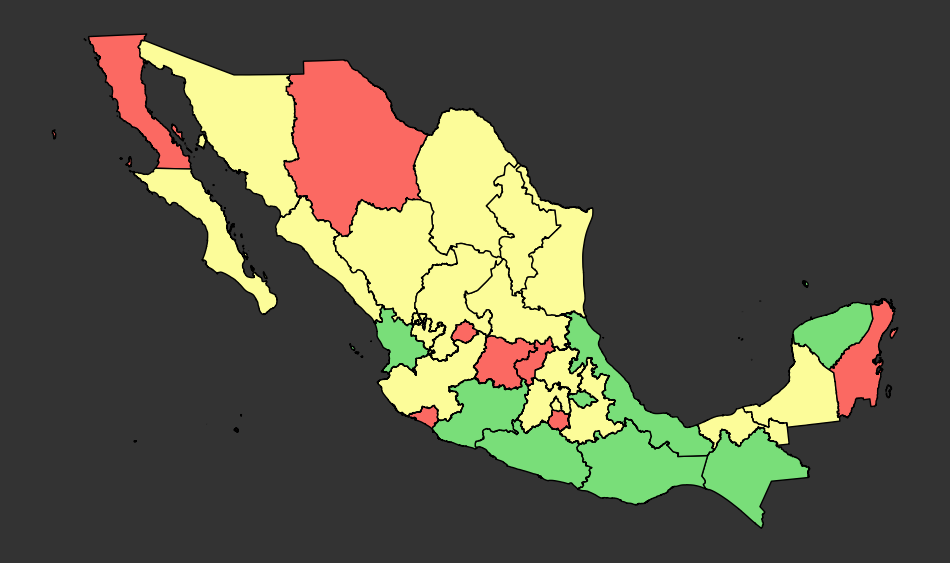

In [256]:
fig, ax = plt.subplots(facecolor="#333333")


gdf_datos_geograficos_ent.plot(legend=True, ax=ax,
                               color=gdf_datos_geograficos_ent["KPI_color"],
                               edgecolor="k", facecolor="black")
plt.axis("off")
fig.set_size_inches(12,12)